# **RANDOM FOREST FROM SCRATCH AND USING SKLEARN**

# IMPORT LIBRARY AND DATA

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, f1_score
pd.set_option('display.max_columns', None)
# %matplotlib inline
!pip install optuna
import optuna
from optuna.samplers import TPESampler

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(context='notebook', palette='muted', style='darkgrid')


df = pd.read_csv('alzheimer_done.csv')

X = df.drop(columns = ['Diagnosis'])
y = df['Diagnosis']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 0, shuffle = True)


In [63]:
df

,MemoryComplaints,BehavioralProblems,ADL,MMSE,FunctionalAssessment,Disorientation,PersonalityChanges,Smoking,HeadInjury,CholesterolTotal,Diagnosis
0,0,0,1.725883,21.463532,6.518877,0,0,0,0,242.366840,0
1,0,0,2.592424,20.613267,7.118696,0,0,0,0,231.162595,0
2,0,0,7.119548,7.356249,5.895077,1,0,0,0,284.181858,0
3,0,1,6.481226,13.991127,8.965106,0,0,1,0,159.582240,0
4,0,0,0.014691,13.517609,6.045039,0,1,0,0,237.602184,0
...,...,...,...,...,...,...,...,...,...,...,...
2144,0,0,4.492838,1.201190,0.238667,0,0,0,0,280.476824,1
2145,0,1,9.204952,6.458060,8.687480,0,0,0,0,186.384436,1
2146,0,0,5.036334,17.011003,1.972137,0,0,0,0,237.024558,1
2147,0,0,3.785399,4.030491,5.173891,0,0,0,0,242.197192,1


# RANDOM FOREST USING SKLEARN

In [64]:
rf_model_entropy = RandomForestClassifier(n_estimators=124, max_depth=19, min_samples_split=2, min_samples_leaf=2, max_features='log2', criterion='entropy')
rf_model_entropy.fit(X_train, y_train)
y_pred_entropy = rf_model_entropy.predict(X_test)

rf_model_gini = RandomForestClassifier(n_estimators=124, max_depth=19, min_samples_split=2, min_samples_leaf=2, max_features='log2', criterion='entropy')
rf_model_gini.fit(X_train, y_train)
y_pred_gini = rf_model_gini.predict(X_test)

acc_skl_entropy = accuracy_score(y_test, y_pred_entropy)
acc_skl_gini = accuracy_score(y_test, y_pred_gini)
print(f"Random Forest Accuracy Entropy: {acc_skl_entropy}")
print(f"Random Forest Accuracy Gini: {acc_skl_gini}")

Random Forest Accuracy Entropy: 0.9651162790697675
Random Forest Accuracy Gini: 0.9674418604651163


In [65]:
# import joblib
# # Save the trained model
# joblib.dump(rf_model_gini, 'random_forest_lib.pkl')

=== Evaluation: Random Forest (Entropy) ===
Confusion Matrix:


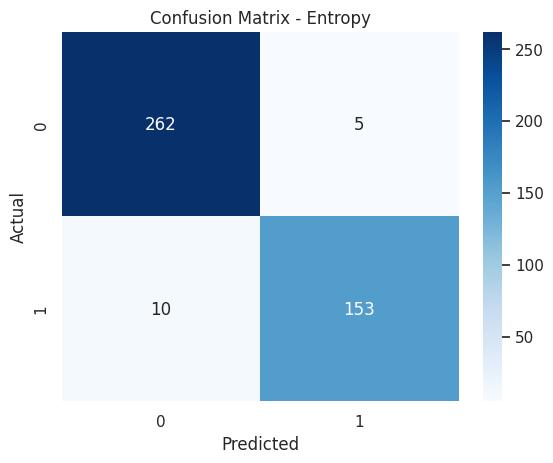


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       267
           1       0.97      0.94      0.95       163

    accuracy                           0.97       430
   macro avg       0.97      0.96      0.96       430
weighted avg       0.97      0.97      0.97       430

Accuracy: 0.9651162790697675
Precision: 0.9657948622486969
Recall: 0.9599618574940834
F1 Score: 0.9627208572468919
ROC AUC: 0.9642930998828152

=== Evaluation: Random Forest (Gini) ===
Confusion Matrix:


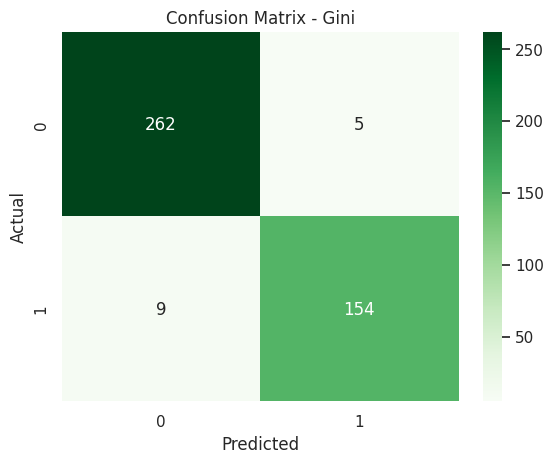


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       267
           1       0.97      0.94      0.96       163

    accuracy                           0.97       430
   macro avg       0.97      0.96      0.97       430
weighted avg       0.97      0.97      0.97       430

Accuracy: 0.9674418604651163
Precision: 0.9676715635080879
Recall: 0.96302934215666
F1 Score: 0.9652497171488605
ROC AUC: 0.9660393832862295


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Đánh giá mô hình Entropy
print("=== Evaluation: Random Forest (Entropy) ===")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_entropy), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Entropy")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_entropy))

print("Accuracy:", accuracy_score(y_test, y_pred_entropy))
print("Precision:", precision_score(y_test, y_pred_entropy, average='macro'))
print("Recall:", recall_score(y_test, y_pred_entropy, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_entropy, average='macro'))

# Nếu là bài toán nhị phân thì thêm AUC:
if len(set(y_test)) == 2:
    y_proba_entropy = rf_model_entropy.predict_proba(X_test)[:, 1]
    print("ROC AUC:", roc_auc_score(y_test, y_proba_entropy))


# Đánh giá mô hình Gini
print("\n=== Evaluation: Random Forest (Gini) ===")
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred_gini), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Gini")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gini))

print("Accuracy:", accuracy_score(y_test, y_pred_gini))
print("Precision:", precision_score(y_test, y_pred_gini, average='macro'))
print("Recall:", recall_score(y_test, y_pred_gini, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred_gini, average='macro'))

if len(set(y_test)) == 2:
    y_proba_gini = rf_model_gini.predict_proba(X_test)[:, 1]
    print("ROC AUC:", roc_auc_score(y_test, y_proba_gini))


In [67]:
k_folds = 5

# Đánh giá với mô hình rf_model_entropy (sử dụng K-Fold Cross Validation)
cv_scores_rf_entropy = cross_val_score(rf_model_entropy, X_train, y_train, cv=k_folds, scoring='accuracy')
print(f"K-Fold Accuracy (rf_model_entropy): {np.mean(cv_scores_rf_entropy):.4f} ± {np.std(cv_scores_rf_entropy):.4f}")

# Đánh giá với mô hình rf_model_gini
cv_scores_rf_gini = cross_val_score(rf_model_gini, X_train, y_train, cv=k_folds, scoring='accuracy')
print(f"K-Fold Accuracy (rf_model_gini): {np.mean(cv_scores_rf_gini):.4f} ± {np.std(cv_scores_rf_gini):.4f}")

K-Fold Accuracy (rf_model_entropy): 0.9441 ± 0.0093
K-Fold Accuracy (rf_model_gini): 0.9459 ± 0.0101


# RANDOM FOREST FROM SCRATCH

In [68]:
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test
y_train = y_train.to_numpy() if isinstance(y_train, pd.Series) else y_train
y_test = y_test.to_numpy() if isinstance(y_test, pd.Series) else y_test


In [69]:
import numpy as np

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTreeClassifier:
    def __init__(self, max_depth=None, min_samples_split=2, criterion="gini"):
        self.root = None
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion

    def fit(self, X, y):
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_classes = len(set(y))

        if depth >= self.max_depth or n_classes == 1 or n_samples <= self.min_samples_split:
            return Node(value=max(set(y), key=list(y).count))

        best_impurity = float('inf')
        best_feature, best_threshold = None, None

        for feature in range(n_features):
            thresholds = sorted(set(X[:, feature]))

            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = X[:, feature] > threshold

                if sum(left_indices) == 0 or sum(right_indices) == 0:
                    continue

                impurity = self._calculate_impurity(y[left_indices], y[right_indices])

                if impurity < best_impurity:
                    best_impurity = impurity
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is None:
            return Node(value=max(set(y), key=list(y).count))

        left_indices = X[:, best_feature] <= best_threshold
        right_indices = X[:, best_feature] > best_threshold

        left = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)

    def _calculate_impurity(self, left_labels, right_labels):
        total = len(left_labels) + len(right_labels)
        if self.criterion == "gini":
            impurity_left = 1.0 - sum([(np.mean(left_labels == c))**2 for c in set(left_labels)])
            impurity_right = 1.0 - sum([(np.mean(right_labels == c))**2 for c in set(right_labels)])
        elif self.criterion == "entropy":
            impurity_left = -sum([
                p * np.log2(p) for p in [np.mean(left_labels == c) for c in set(left_labels)] if p > 0
            ])
            impurity_right = -sum([
                p * np.log2(p) for p in [np.mean(right_labels == c) for c in set(right_labels)] if p > 0
            ])
        else:
            raise ValueError("Unknown criterion: {}".format(self.criterion))

        return (len(left_labels) / total) * impurity_left + (len(right_labels) / total) * impurity_right

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        else:
            return self._traverse_tree(x, node.right)
class RandomForestClassifier:
    def __init__(self, n_estimator=100, max_depth=None, min_samples_split=2, criterion="gini"):
        self.n_estimator = n_estimator
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_estimator):
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                criterion=self.criterion
            )
            indices = np.random.choice(len(X), len(X), replace=True)
            tree.fit(X[indices], y[indices])
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.zeros((len(X), len(self.trees)))
        for i , tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        predictions = predictions.astype(int)
        return np.array([np.bincount(row).argmax() for row in predictions])


In [70]:
from sklearn.metrics import accuracy_score, classification_report

# Cấu hình chung
params = {
    'n_estimator': 21,
    'max_depth': 13,
    'min_samples_split': 2
}

# Gini
clf_gini = RandomForestClassifier(**params, criterion='gini')
clf_gini.fit(X_train, y_train)
y_pred_gini = clf_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)
report_gini = classification_report(y_test, y_pred_gini)

# Entropy
clf_entropy = RandomForestClassifier(**params, criterion='entropy')
clf_entropy.fit(X_train, y_train)
y_pred_entropy = clf_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)
report_entropy = classification_report(y_test, y_pred_entropy)

# Kết quả
print(f"\nAccuracy with Gini:     {acc_gini:.4f}")
print("Classification Report (Gini):\n", report_gini)

print(f"\nAccuracy with Entropy:  {acc_entropy:.4f}")
print("Classification Report (Entropy):\n", report_entropy)

# So sánh kết luận
if acc_gini > acc_entropy:
    print(f"\nGini cho kết quả tốt hơn với độ chính xác: {acc_gini:.4f}")
elif acc_entropy > acc_gini:
    print(f"\nEntropy cho kết quả tốt hơn với độ chính xác: {acc_entropy:.4f}")
else:
    print(f"\nCả hai đều cho kết quả tương đương với độ chính xác: {acc_gini:.4f}")



Accuracy with Gini:     0.9512
Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       267
           1       0.96      0.91      0.93       163

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.95       430
weighted avg       0.95      0.95      0.95       430


Accuracy with Entropy:  0.9581
Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       267
           1       0.96      0.93      0.94       163

    accuracy                           0.96       430
   macro avg       0.96      0.95      0.96       430
weighted avg       0.96      0.96      0.96       430


Entropy cho kết quả tốt hơn với độ chính xác: 0.9581


In [71]:
# import joblib
# # Save the trained model
# joblib.dump(clf_gini, 'random_forest_scr.pkl')

In [72]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# Hàm K-Fold Cross Validation
def k_fold_cross_val(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []

    # Chạy K-Fold Cross Validation
    for train_index, val_index in kf.split(X):
        # Chia dữ liệu
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        # Huấn luyện mô hình
        model.fit(X_train, y_train)

        # Dự đoán và tính accuracy
        y_pred = model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)
        accuracies.append(accuracy)

    # Trả về độ chính xác trung bình và độ lệch chuẩn
    return np.mean(accuracies), np.std(accuracies)

# Cấu hình chung cho mô hình
params = {
    'n_estimators': 21,
    'max_depth': 13,
    'min_samples_split': 2
}

# Tạo hai mô hình: clf_entropy và clf_gini
clf_entropy = RandomForestClassifier(**params, criterion='entropy')
clf_gini = RandomForestClassifier(**params, criterion='gini')

# Dữ liệu (X_train, y_train là dữ liệu huấn luyện của bạn)
# Ví dụ sử dụng K-Fold cho cả hai mô hình
mean_acc_entropy, std_acc_entropy = k_fold_cross_val(clf_entropy, X_train, y_train, k=5)
mean_acc_gini, std_acc_gini = k_fold_cross_val(clf_gini, X_train, y_train, k=5)

# In kết quả
print(f"\nK-Fold Accuracy (clf_entropy): {mean_acc_entropy:.4f} ± {std_acc_entropy:.4f}")
print(f"K-Fold Accuracy (clf_gini):    {mean_acc_gini:.4f} ± {std_acc_gini:.4f}")

# So sánh kết quả
if mean_acc_entropy > mean_acc_gini:
    print(f"\nEntropy cho kết quả tốt hơn với độ chính xác: {mean_acc_entropy:.4f}")
elif mean_acc_gini > mean_acc_entropy:
    print(f"\nGini cho kết quả tốt hơn với độ chính xác: {mean_acc_gini:.4f}")
else:
    print(f"\nCả hai đều cho kết quả tương đương với độ chính xác: {mean_acc_gini:.4f}")



K-Fold Accuracy (clf_entropy): 0.9471 ± 0.0114
K-Fold Accuracy (clf_gini):    0.9430 ± 0.0123

Entropy cho kết quả tốt hơn với độ chính xác: 0.9471


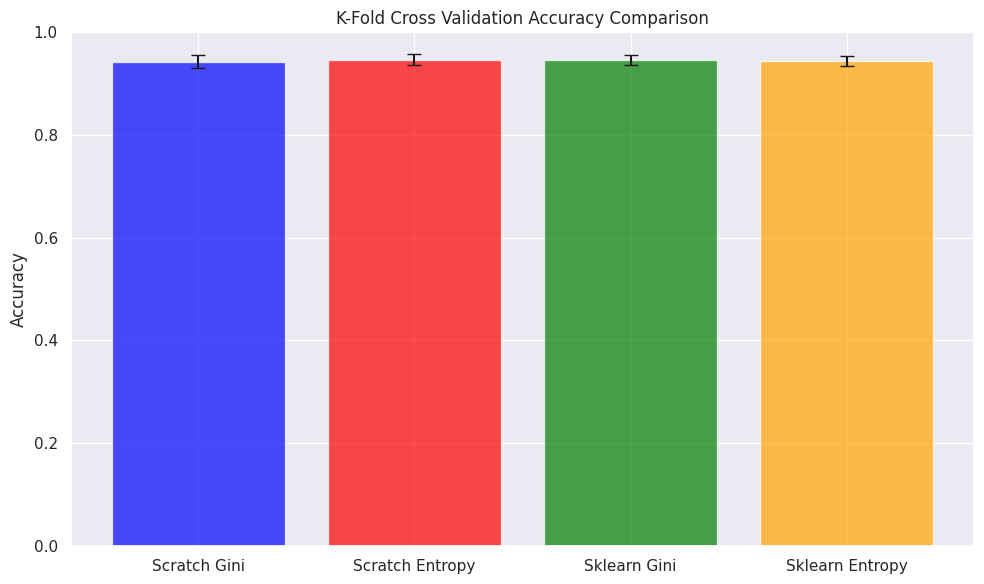

In [73]:
# Tính toán độ chính xác trung bình và độ lệch chuẩn của các mô hình
mean_scores = [
    mean_acc_gini,
    mean_acc_entropy,
    np.mean(cv_scores_rf_gini),
    np.mean(cv_scores_rf_entropy)
]

std_scores = [
    std_acc_gini,
    std_acc_entropy,
    np.std(cv_scores_rf_gini),
    np.std(cv_scores_rf_entropy)
]

# Tạo biểu đồ
models = ['Scratch Gini', 'Scratch Entropy', 'Sklearn Gini', 'Sklearn Entropy']
x_pos = np.arange(len(models))

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(x_pos, mean_scores, yerr=std_scores, capsize=5, color=['blue', 'red', 'green', 'orange'], alpha=0.7)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.title('K-Fold Cross Validation Accuracy Comparison')
plt.ylim(0, 1)
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

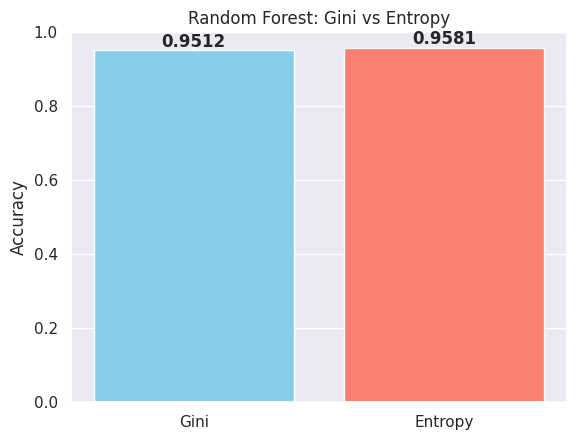

In [74]:
import matplotlib.pyplot as plt

labels = ['Gini', 'Entropy']
accuracies = [acc_gini, acc_entropy]

plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylabel('Accuracy')
plt.title('Random Forest: Gini vs Entropy')
plt.ylim(0, 1)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()


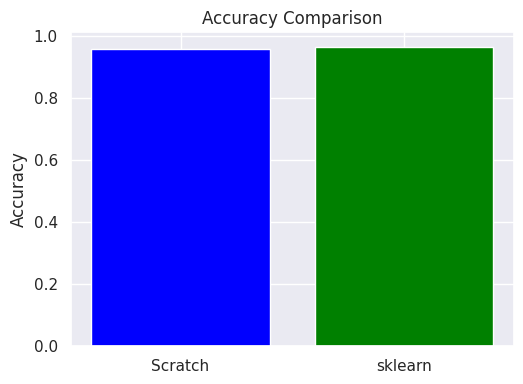

In [75]:
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.bar(["Scratch", "sklearn"], [acc_entropy, acc_skl_entropy], color=["blue", "green"])
plt.title("Accuracy Comparison")
plt.ylabel("Accuracy")

plt.tight_layout()
plt.show()

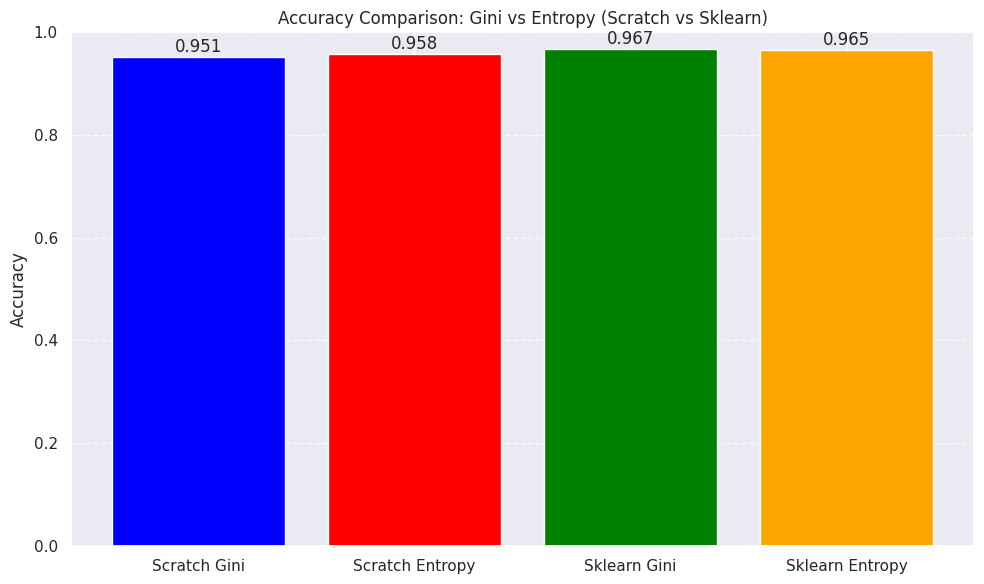

In [76]:
# Tên các mô hình
labels = ['Scratch Gini', 'Scratch Entropy', 'Sklearn Gini', 'Sklearn Entropy']
accuracies = [acc_gini, acc_entropy, acc_skl_gini, acc_skl_entropy]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, accuracies, color=['blue', 'red', 'green', 'orange'])

# Thêm nhãn giá trị trên đầu mỗi cột
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.002, f"{yval:.3f}", ha='center', va='bottom')

# Cấu hình biểu đồ
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison: Gini vs Entropy (Scratch vs Sklearn)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

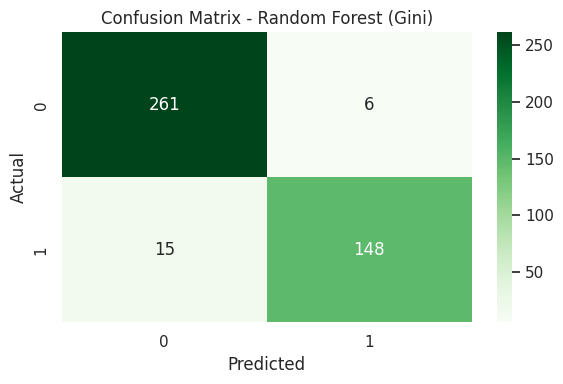

In [77]:
# Vẽ biểu đồ confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
from sklearn.metrics import confusion_matrix

# Calculate confusion matrices
cm_gini = confusion_matrix(y_test, y_pred_gini) # Changed this line
plot_confusion_matrix(cm_gini, "Random Forest (Gini)")


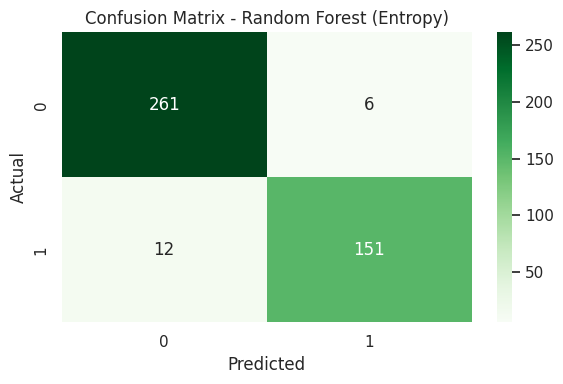


Entropy cho kết quả tốt hơn với độ chính xác: 0.9581


In [78]:
cm_entropy = confusion_matrix(y_test, y_pred_entropy) # Changed this line
plot_confusion_matrix(cm_entropy, "Random Forest (Entropy)")
# So sánh kết luận
if acc_gini > acc_entropy:
    print(f"\nGini cho kết quả tốt hơn với độ chính xác: {acc_gini:.4f}")
elif acc_entropy > acc_gini:
    print(f"\nEntropy cho kết quả tốt hơn với độ chính xác: {acc_entropy:.4f}")
else:
    print(f"\nCả hai đều cho kết quả tương đương với độ chính xác: {acc_gini:.4f}")

In [79]:
# Bước 1: Load dữ liệu mới
X_new = pd.read_csv("test.csv")

# Bước 2: (nếu cần) xử lý giống như X_train
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)
X_new = pd.DataFrame(X_new, columns=X.columns)


# Bước 3: Dự đoán
y_pred_new_scr_entropy = clf_entropy.predict(X_new)
y_pred_new_scr_gini = clf_gini.predict(X_new)
y_pred_new_skl_entropy = rf_model_entropy.predict(X_new)
y_pred_new_skl_gini = rf_model_gini.predict(X_new)

# Bước 4: In kết quả hoặc lưu ra file
print(y_pred_new_scr_entropy)
print(y_pred_new_scr_gini)
print(y_pred_new_skl_entropy)
print(y_pred_new_skl_gini)
# pd.DataFrame(y_pred_new).to_csv("predictions.csv", index=False)


[1 1 0 1 1 0 0 0 1 1 0]
[1 1 0 1 1 0 0 0 1 1 0]
[1 1 0 1 1 0 0 0 1 1 0]
[1 1 0 1 1 0 0 0 1 1 0]
